In [773]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #To Interact with local system directories
import numpy as np # linear algebra
import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so For Plots!
from scipy import stats #import chi2_contigency #  for Chi square Test
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier # checking if this is available

#Checking the curret directory and changing it to desired one
os.getcwd()
os.chdir("C:/Users/samalepati/Desktop/EDwisor/Bike rental/")
os.getcwd()

input_data = pd.read_csv("day.csv")

#checking the `head` of the data
input_data.head()
#checking the data variables
#input_data.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Missing Value Analysis

In [774]:
#Missing Value Analysis
missing_val = pd.DataFrame(input_data.isnull().sum())
print (missing_val)

#Clearly there are no missing values in the data

            0
instant     0
dteday      0
season      0
yr          0
mnth        0
holiday     0
weekday     0
workingday  0
weathersit  0
temp        0
atemp       0
hum         0
windspeed   0
casual      0
registered  0
cnt         0


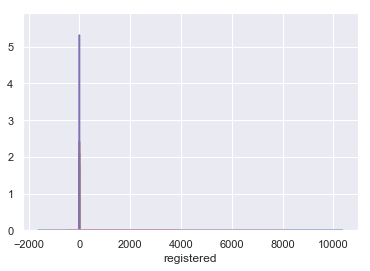

In [775]:
#checking the target variable
input_data['cnt'].describe() #type of target variable is float and its a continouous variable
#distrubution plot of target variable
sns.distplot(input_data['cnt']);

#distrubution plot of all numerical variables variable

sns.distplot(input_data['temp']);

sns.distplot(input_data['atemp']);

sns.distplot(input_data['hum']);

sns.distplot(input_data['windspeed']);

sns.distplot(input_data['casual']);

sns.distplot(input_data['registered']);


# Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x22f7d3f0>,
 'caps': [<matplotlib.lines.Line2D at 0x22f7d6b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f7d130>],
 'medians': [<matplotlib.lines.Line2D at 0x22f7de10>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f7def0>],
 'means': []}

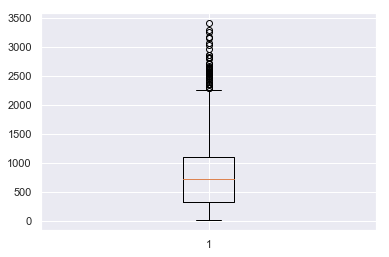

In [776]:
#instant	dteday	season	yr	mnth	holiday	weekday	workingday	weathersit	temp	atemp	hum	windspeed	casual	registered	cnt
#Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(input_data['casual'])

#plt.boxplot(input_data['registered'])




In [777]:
#old code

# #Detect and delete outliers from data

# # As outlier analysis is done only on continuous variables storing all continuous variables names into a variable
# #cnames = [ "temp", "atemp", "hum" , "windspeed" , "casual" , "registered"] 
# cnames = ["casual"]
# #df = input_data.copy()
# #input_data = df.copy()
# for i in cnames:
#     print(i)
#     q75, q25 = np.percentile(input_data.loc[:,i], [75 ,25])
#      iqr = q75 - q25
#     min = q25 - (iqr*1.5)
#     max = q75 + (iqr*1.5)
#     print(min)
#     print(max) 
#     input_v2 = input_data.drop(input_data[input_data.loc[:,i] < min].index)
#     input_v2 = input_v2.drop(input_data[input_data.loc[:,i] > max].index)
        
# #input data beforing removing outliers = 731 
# #input data after removing outliers = 687
# # difference =  records its less than 10% of total

-855.25
2266.75


0.6460020508747335

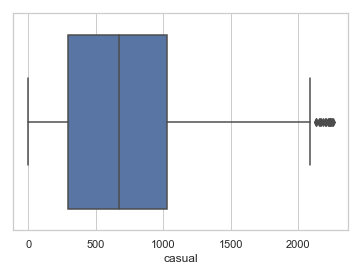

In [778]:
#Modified code

cnames = ['casual']
for i in cnames:
    q75, q25 = np.percentile(df_day.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
     
        
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

input_v2 = input_data.copy()

input_v2 = input_v2.drop(input_v2[input_v2.loc[:,'casual'] < min].index)
input_v2 = input_v2.drop(input_v2[input_v2.loc[:,'casual'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x=input_v2['casual'],orient ='h')

# Correlation between 'casual' and 'cnt'  after  removal of  outliers
#sns.regplot(x="casual", y="cnt", data=df_day_out);

input_v2['casual'].corr(input_v2['cnt'])


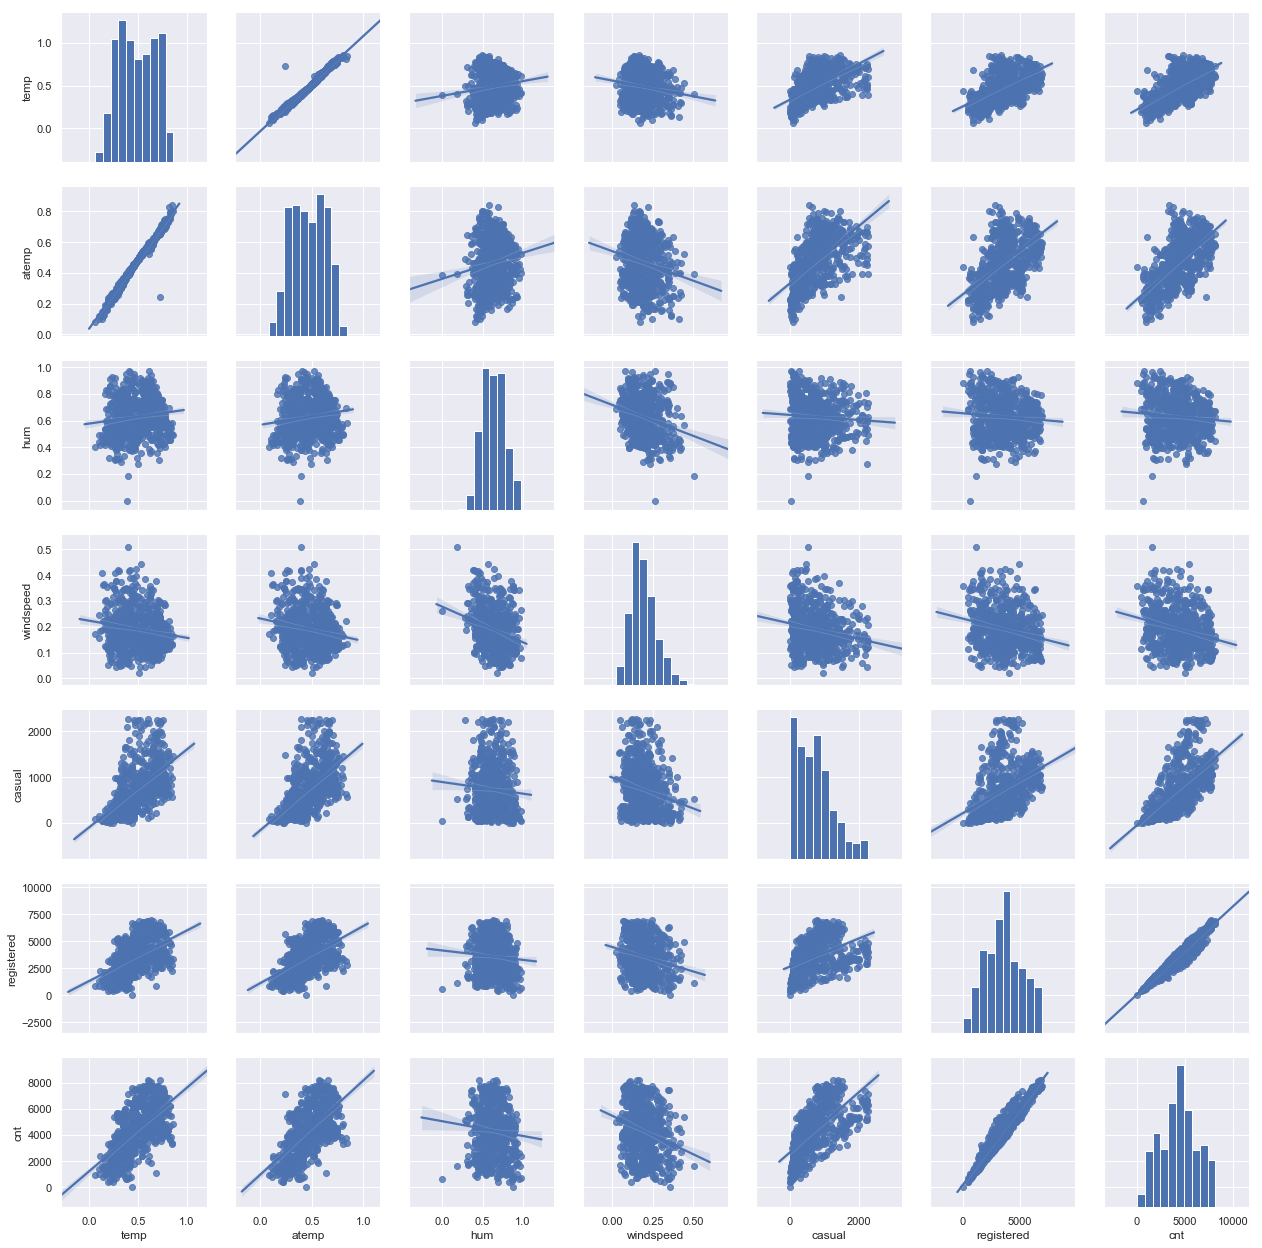

(687, 5)

In [779]:
# check relationship with scatter plots

sns.set()
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(input_v2[cols], height = 2.5,kind="reg")
plt.show();

#As per scatter plots and above Correlation  graph there is strong relation 
# Independent variable   'temp' and 'atemp'
# There is a   poor relation between  Independent variable 'hum' and dependent  variable 'cnt'

# so dropping two variables for feature selection

numeric_features = input_v2.loc[:,['temp', 'windspeed', 'casual', 'registered', 'cnt']]

numeric_features.head()

numeric_features.shape

In [610]:
#df.count()
#input_data.count()
#input_v2 = input_data.copy()
input_v2.shape
#input_v2['casual']

(687, 16)

In [597]:
# #since 10% data is lost due to dropping outliers we will try to replace them with NA and predict them instead of dropping
# #Detect and replace with NA
# #Extract quartiles
# q75, q25 = np.percentile(input_data['casual'], [75 ,25])

# #Calculate IQR
# iqr = q75 - q25

# #Calculate inner and outer fence

# minimum = q25 - (iqr*1.5)
# maximum = q75 + (iqr*1.5)

# #for the boxplot analysis outliers are present only in the casual variable
# #Replace with NA
# input_data.loc[input_data['casual'] < minimum,:'casual'] = np.nan
# input_data.loc[input_data['casual'] > maximum,:'casual'] = np.nan

# #Calculate missing value
# #missing_val = pd.DataFrame(input_data.isnull().sum())


# #Impute with mean
# #input_data['casual'] = input_data['casual'].fillna(input_data['casual'].mean())

# #Impute with median
# #input_data['casual'] = input_data['casual'].fillna(input_data['casual'].median())

# #from fancyimpute import KNN

# #input_data['casual'] = pd.DataFrame(KNN(k = 3).complete(input_data), columns = 'casual')



In [611]:
#Calculate missing value
# missing_val = pd.DataFrame(input_v2.isnull().sum())

# print(missing_val)
#Impute with mean
#input_data['casual'] = input_data['casual'].fillna(input_data['casual'].mean())

#Impute with median
#input_data['casual'] = input_data['casual'].fillna(input_data['casual'].median())

#from fancyimpute import KNN

#input_data['casual'] = pd.DataFrame(KNN(k = 3).complete(input_data), columns = 'casual')

            0
instant     0
dteday      0
season      0
yr          0
mnth        0
holiday     0
weekday     0
workingday  0
weathersit  0
temp        0
atemp       0
hum         0
windspeed   0
casual      0
registered  0
cnt         0


In [612]:
#input_v2['casual'].round()
#input_v2['casual'] = input_v2['casual'].astype(np.int64)
#input_data['registered'].round().astype(np.int64)
#print(input_data)
input_data.shape

(731, 16)

{'whiskers': [<matplotlib.lines.Line2D at 0x202fe1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x203d06b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x202fe250>],
 'medians': [<matplotlib.lines.Line2D at 0x205d6850>],
 'fliers': [<matplotlib.lines.Line2D at 0x205d6d10>],
 'means': []}

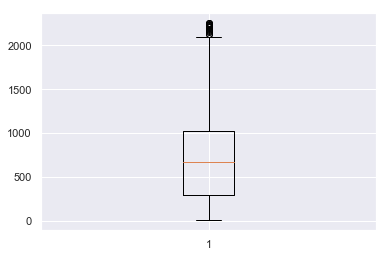

In [780]:
plt.boxplot(input_v2['casual'])

# Feature Selection

In [781]:
##Correlation analysis
#Correlation plot
cnames = [ "temp", "atemp", "hum" , "windspeed" , "casual" , "registered"] 
df_corr = input_v2.loc[:,cnames]

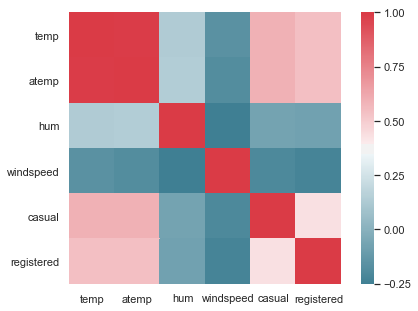

In [782]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#From the heat map it is clear that temp and atemp contain the same information so one of them can be ignored.

In [783]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["season", "yr", "mnth" , "holiday" ,"weekday", "workingday" , "weathersit"] 

In [784]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(input_data['cnt'], input_data[i]))
    print(p)

#if p value is greater than 0.05 we will reject that variable
#drop all the categorical variables with p > 0.05


season
0.5440596338517547
yr
0.367724209978971
mnth
0.49177634472851
holiday
0.6781463865579803
weekday
0.4102128310764939
workingday
0.45435914436398794
weathersit
0.6407439686474243


# Feature Scaling

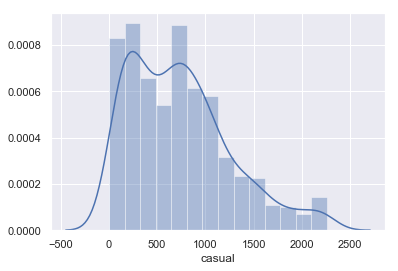

In [785]:
# #Normality check
# #Distribution plots of independent numeric variables 
# sns.distplot(input_v2['temp']);

# sns.distplot(input_v2['atemp']);

# sns.distplot(input_v2['hum']);

# sns.distplot(input_v2['windspeed']);

sns.distplot(input_v2['casual']); #plot of the variable 'casual' in not normally distributed

#sns.distplot(input_v2['registered']);


In [786]:
# feature  Scaling
#input_v2['casual'] = input_v2['casual'].round()
#input_v2['casual'] = input_v2['casual'].astype(np.int64)
#input_v2['registered'].round().astype(np.int64)
#print(input_v2)

input_v2.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [787]:
# feature  Scaling
#input_data['casual'].round().astype('object')
#input_data['registered'].round().astype('object')
#since all other continuous varibles are Normal and scaled
cnames = ['casual','registered']

for i in cnames:
    print(i)
    input_v2[i] = (input_v2[i] - min(input_v2[i]))/(max(input_v2[i]) - min(input_v2[i]))


casual


TypeError: 'numpy.float64' object is not callable

# Model Development

# Decision tree

In [788]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [789]:
#Divide data into train and test
X = input_data.values[:,10:15]
Y = input_data.values[:,15]

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2)

In [791]:
input_v2.shape
# input_data.shape

(687, 16)

In [792]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 8 , min_samples_split = 4 , random_state = 1 )
tree = tree.fit(X_train, Y_train)
print(tree)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')


In [793]:
predicted_data = tree.predict(X_test)

print(predicted_data)


[4531.66666667 7443.82758621 6248.77777778 2157.5         459.33333333
  783.33333333 5619.77777778 6002.33333333 7443.82758621 3562.
 3987.57142857 3633.28571429 5051.33333333 4703.5        5232.33333333
 4783.22222222 7354.         8213.66666667 7003.2        4295.66666667
 2415.75       7445.8        6632.33333333 2169.         4512.2
 3424.         4703.5        5473.         2803.85714286 7680.5
 3036.33333333 5051.33333333 1439.         3258.28571429 3562.
 4646.91666667 1824.8        6563.5        4116.5        3633.28571429
 1439.         6299.25       3258.28571429 4646.91666667 6632.33333333
 6818.33333333 1723.         7443.82758621 5711.58823529 4940.72727273
 6248.77777778 1541.5        3258.28571429 5155.         6871.5
 3983.33333333 4301.14285714 2803.85714286 7354.         5711.58823529
 6632.33333333 1097.         4646.91666667 5347.         1449.33333333
 5687.         6034.         5461.         4574.         3726.75
 3606.         4783.22222222 6730.5        5711.5

In [794]:
def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)
    return rmse



#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape



In [796]:
MAPE(Y_test, predicted_data)

#RMSE(y_test, predictions_DT)

#MAPE = 3.67

ValueError: operands could not be broadcast together with shapes (138,) (147,) 

In [797]:
#Random Forest 


# #Divide data into train and test
X = input_v2.values[:,10:15]
Y = input_v2.values[:,15]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)



# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor

RF_model_one = RandomForestRegressor(n_estimators= 500, random_state=100).fit(X_train,y_train)

# Predict the model using predict funtion

RF_predict_one= RF_model_one.predict(X_test)

print(RF_predict_one)

[4490.726 5574.288 4201.28  5590.48  5048.434 7635.682 3115.446 1553.454
 2249.406 4090.446 1621.674 3305.422 3157.208 4186.494 2683.748 1181.87
 1241.39  3670.922 4518.944 4047.476 5179.162 7871.508 2778.554 7075.706
 4332.338 3339.652 3173.692 5222.096 4753.026 5840.442 4002.542 6586.452
 4604.558 7682.    4543.044 3569.962 4764.984 6890.1   1717.098 4094.062
 4708.294 4102.704 1495.716  604.13  5345.724 5018.964 3569.728 2910.934
 7451.042 6263.612 6122.826 1612.88   533.43   853.142 3601.882 3912.504
 5999.902 4900.096 1939.856 6172.118 5457.982 5378.77  4712.376 2419.126
 6485.354 4418.992 4172.944 5791.92  4233.608 7568.406 4058.11  6868.236
 5677.362 7474.048 6389.438 4943.264 3931.418 7590.282 3771.308 1863.892
 6112.11  2066.55  5290.212 6789.032 2545.826 3904.244 2761.778 3604.708
 1879.438 3650.564 4586.918 3341.044 3131.154 1348.918 2139.824 5293.004
 3922.134 2183.478 7592.766 5988.102 2016.372 7859.33  4067.112 2123.048
 1201.064 4990.322 1377.166 4351.758 3589.862 6915.7

In [799]:
MAPE(y_test, RF_predict_one)

#MAPE is 1.83

# RMSE(y_test, RF_predict_one)

#RMSE improved to 93

#And MAPE value reduced by using Random forest compared to Decision tree

Mean Square :  9299.81293773912
Root Mean Square :  96.43553773241024


96.43553773241024

In [800]:
#Divide data into train and test
X1 = input_v2.values[:,8:15]
Y1 = input_v2.values[:,15]

# UPDATE - 
X1 = X1.astype(float)
Y1 = Y1.astype(float)

X_train_lr, X_test_lr, Y_train_lr, Y_test_lr = train_test_split( X1, Y1, test_size = 0.2)

In [801]:
input_v2.shape
#Impute with mean
#input_v2['atemp'] = input_v2['atemp'].fillna(input_v2['atemp'].mean())
#input_v2['hum'] = input_v2['hum'].fillna(input_v2['hum'].mean())
#input_v2['windspeed'] = input_v2['windspeed'].fillna(input_v2['windspeed'].mean())
print(X_train_lr[1])
#X_train.astype(float)
#Y_train.astype(float)

[1.00000e+00 7.22500e-01 6.52162e-01 3.96250e-01 1.02608e-01 1.24600e+03
 4.11600e+03]


In [802]:
#import  linear regreesion  

import statsmodels.api as sm

#develop Linear Regression model using sm.ols

linear_regression_model = sm.OLS(Y_train_lr, X_train_lr).fit()

#X_train.shape
#print(Y_train)


In [803]:
#Summary of model
linear_regression_model.summary()

#predict the  model

predict_LR = linear_regression_model.predict(X_test_lr)

print(predict_LR) 

[4401. 4153.  985. 1795. 2133. 3387. 4195. 5409. 2114. 5026. 4763. 7570.
 3805. 7592. 7424. 1317. 7499. 5538. 4304. 2425. 5382. 4120. 7105. 4332.
 6966. 5936. 4911. 4058. 6639. 4548. 5130. 3855. 7582. 7534. 3614. 6784.
 4792. 7384. 3351. 2566. 1248. 5464. 6889. 4694. 5107. 7175. 6904. 1977.
 1650. 4105. 5515. 5986. 1872. 2739. 3641. 6530. 3598. 4669. 7691. 4098.
 7328. 2792. 1985. 2425. 3239. 4109.  920. 6664. 4758. 2689. 2132. 7415.
 6998. 2802. 4790. 3922. 4760. 2046. 4835. 7580. 5323. 5255. 3423. 3117.
 4400. 4456. 4433. 4891. 5169. 4661. 2252. 7001. 4758. 4151. 6359. 3846.
 4579. 6203. 5698. 5531. 5267. 7504. 5557. 1683.  683. 5259. 6457. 4511.
 4881. 3727. 3915. 4484. 3907. 6825. 4123. 1913. 3333. 3392. 5582. 1842.
 4067. 7693. 4592. 5058. 7442. 4150. 7765. 7461. 3785.   22. 1600. 3429.
 4187. 2192. 4086. 4333. 6421. 1472.]


In [806]:
MAPE(Y_test_lr,predict_LR)
# 1.823

#RMSE(y_test,predict_LR)

5.724969388195526e-14